# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 17 de abril de 2022__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [3]:
RANDOM_STATE = 133

# Apartado 2: Recuperación de información

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

## 1) Carga del conjunto de datos

El fichero `BBC News.csv` contiene noticias clasificadas en 5 categorías diferentes. 

Carga los datos en un dataframe teniendo en cuenta que la columna `ArticleId` es un identificador de la noticia y por lo tanto no lo vamos a usar. 

Estudia el tamaño del conjunto de datos y la proporción de noticias que pertenecen a cada una de las categorías.

Crea una partición estratificada de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. 

In [4]:
import pandas as pd
import numpy as np

file = 'BBC News.csv'
csv = pd.read_csv(file, sep=',')
df = pd.DataFrame(csv, columns = ['Text','Category']) #importar csv sin ArticleId

In [5]:
# Estudia el tamaño del conjunto de datos y la proporción de noticias que pertenecen a cada una de las categorías.
#------------------------------------------------------------------------------

df['Category'].value_counts() #contar veces que aparece cada valor 

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [6]:
# Crea una partición estratificada de los datos dejando el 80% para entrenamiento y el 20% restante para test
# usando la función `train_test_split` de sklearn. 
#------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2,random_state=RANDOM_STATE) #mezclo y cojo el 20% para prueba

#Como los indices no se corresponden a la posicion de la lista y sufrimos el riesgo de acceder
#a una posicion vacía, los reajustamos con un dataframe nuevo

aux = {'Text': train_data.Text.tolist(), 
        'Category': train_data.Category.tolist()}
train_data = pd.DataFrame(aux, columns=['Text', 'Category'])

aux = {'Text': test_data.Text.tolist(),
        'Category': test_data.Category.tolist()}
test_data = pd.DataFrame(aux, columns=['Text', 'Category'])

print(train_data) #entrenamiento
print(test_data) #prueba

                                                   Text  Category
0     warning over us pensions deficit taxpayers may...  business
1     collins calls for chambers return world 100m c...     sport
2     safety alert as gm recalls cars the world s bi...  business
3     jp morgan admits us slavery links thousands of...  business
4     clarke to press on with id cards new home secr...  politics
...                                                 ...       ...
1187  us in eu tariff chaos trade row the us has ask...  business
1188  benitez  to launch morientes bid  liverpool ma...     sport
1189  progress on new internet domains by early 2005...      tech
1190  mauresmo opens with victory in la amelie maure...     sport
1191  henman decides to quit davis cup tim henman ha...     sport

[1192 rows x 2 columns]
                                                  Text       Category
0    boris opposes mayor apology ken livingstone sh...       politics
1    wenger signs new deal arsenal manager 

## 2) Representación basada en bolsa de palabras y tf-idf

La primera vectorización que vamos a usar representará los mensajes usando el modelo de bolsa de palabras, monogramas y el valor tf-idf de cada palabra. Usa como _stop words_ las que vienen configuradas por defecto para el inglés.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test. Muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
   
vectorizer = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,1), token_pattern=r'(?u)\b[A-Za-z]+\b') 

# Tomamos los textos del conjunto de entrenamiento y los transformamos en 
# una matriz de datos (palabras) según el diccionario estándar
train_vector_data=vectorizer.fit_transform(train_data.Text)

# Tomamos los textos del conjunto de test y los transformamos en una matriz
# de palabras. Al usar "transform" toma como referencia únicamente las palabras
# encontradas en el conjunto de entrenamiento
test_vector_data=vectorizer.transform(test_data.Text)

feature_names = vectorizer.get_feature_names()

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer 

tfidftrans = TfidfTransformer()

train_preprocessed = tfidftrans.fit_transform(train_vector_data)
test_preprocessed = tfidftrans.transform(test_vector_data)

In [9]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [10]:
# Muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?
#------------------------------------------------------------------------------

write_terms(feature_names, train_data['Text'], train_preprocessed, 0)

Mensaje 0 : warning over us pensions deficit taxpayers may have to bail out the us agency that protects workers  pension funds  leading economists have warned.  with the pension benefit guaranty corporation (pbgc) some £23bn (£12m) in deficit  the financial economists roundtable (fer) wants congress to act. instead of taxpayers having to pick up the bill  the fer wants congressmen to change the pbgc s funding rules. the fer says firms should not have been allowed to reduce the insurance premiums they pay into the pbgc fund. the fer blames this on a 2004 law  in a statement signed by several members  who include nobel economics laureate william sharpe. it said it was  dismayed  at the situation and wants congress to overturn the legislation.  cash-strapped us companies  including those in the airline  car-making and steel industries  had argued in favour of the 2004 rule change  claiming that funding the insurance premiums adequately would force them to have to cut jobs.  with a little 

In [12]:
# Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno.
# Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.
#------------------------------------------------------------------------------

from sklearn.metrics.pairwise import cosine_similarity

def knn(query, X_train, k):
    '''Devuelve los índices de los k documentos de entrenamiento más similares a la consulta usando 
    la similitud del coseno.
    
    Parámetros:
    - query: documento consulta vectorizado
    - X_train: documentos de entrenamiento vectorizados
    - k: número de documentos a recuperar
    
    Devuelve:
    - índices de los k documentos más similares a la consulta.
    '''
    
    # Necesitamos un vector de dimensión (1, X). Si se pasa un vector de dimensión X, transformarlo
    if len(query.shape) == 1:
        query = query.reshape(1, -1)

    simil = cosine_similarity(query, X_train)
    simil_idx = np.argsort(simil.flatten())
    simil_idx = simil_idx[::-1]
    return simil_idx[:k]

In [13]:
def precision_at_k(y_selected, y_real, k):
    '''Devuelve la precisión @k de los documentos seleccionados.
    
    Parametros:
    - y_selected: etiquetas de los documentos seleccionados (se usan los k primeros)
    - y_real: etiqueta de la categoría correcta
    - k: número de documentos que se tienen en cuenta
    
    Devuelve:
    - Precisión@k
    '''
    
    return np.sum(y_selected[:k] == y_real) / k * 100

In [14]:
def mean_precisions_per_class(X_train, y_train, X_test, y_test, k):
    '''Devuelve las precision@k media para cada una de las classes.
    
    Parámetros:
    - X_train: documentos de entrenamiento vectorizados.
    - y_train: etiquetas de los documentos de entrenamiento.
    - X_test: documentos vectorizados que se usan como consultas
    - y_test: etiquetas de los documentos que se usan como consultas
    - k: número de documentos considerados a recuperar por la consulta
    
    Devuelve:
    - Diccionario clase -> precisión en tanto por ciento.
    '''
    
    # diccionario categoría -> lista de precisiones
    y_precisions = {y: [] for y in np.unique(y_test)}
    
    # Calcular precision@k para cada consulta
    for x_query, y_query in zip(X_test, y_test):
        idx = knn(x_query, X_train, k)
        y_selected = np.take(y_train, idx)
        precision = precision_at_k(y_selected, y_query, k)
        y_precisions[y_query].append(precision)
        
    # Calcular medias
    for y in y_precisions:
        y_precisions[y] = np.mean(y_precisions[y])
    
    return y_precisions

In [16]:
p5 = mean_precisions_per_class(train_preprocessed, train_data['Category'], test_preprocessed, test_data['Category'], 5)
    
p5

{'business': 83.88888888888889,
 'entertainment': 78.33333333333333,
 'politics': 87.9245283018868,
 'sport': 97.74193548387096,
 'tech': 87.84313725490196}

<AxesSubplot:xlabel='target'>

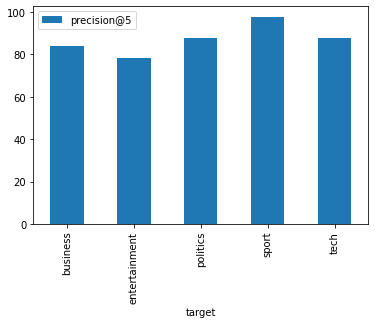

In [20]:
# Dibuja los resultados en un diagrama de barras y comenta las clases en las que se comporta mejor y peor.
# ¿Crees que los resultados son buenos?
#------------------------------------------------------------------------------

import pandas as pd

df_p5 = pd.DataFrame.from_dict(p5, orient='index', columns=['precision@5'])

df_p5["target"] = ['business', 'entertainment', 'politics','sport', 'tech']

d = df_p5.set_index("target")

d.plot.bar()

EXPLICAR MOVIDAS

## 3) Representación basada en word-embeddings y tf-idf

La segunda vectorización que vamos a usar representará los mensajes usando usando word-embeddings usando como los pesos tf-idf de cada palabra. Al igual que en el apartado anterior, usaremos monogramas y las _stop words_ que vienen configuradas por defecto para el inglés. Recuerda usar como vocabulario para vectorizar el vocabulario del fichero con las word-embeddings.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test.


In [21]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Traducimos el fichero glove a un fichero con formato word2vec
glove_file = 'words.txt'

# Gensim 4 puede transformar de glove a word2vec directamente
we_model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# En Gensim 4 se pueden obtener de la siguiente manera
# we_vocabulary = sorted(model.key_to_index.keys(), key=lambda word: model.get_vecattr(word, "count"), reverse=True)
we_vocabulary = list(we_model.key_to_index.keys())

we_vectorizer = CountVectorizer(vocabulary = we_vocabulary, stop_words='english', binary=False,ngram_range=(1,1), token_pattern=r'(?u)\b[A-Za-z]+\b')

we_train_vector_data = we_vectorizer.fit_transform(train_data.Text)

# Tomamos los textos del conjunto de test y los transformamos en una matriz
# de palabras. Al usar "transform" toma como referencia únicamente las palabras
# encontradas en el conjunto de entrenamiento
we_test_vector_data=we_vectorizer.transform(test_data.Text)

we_feature_names = we_vectorizer.get_feature_names()

In [23]:
we_tfidftrans = TfidfTransformer()

we_train_preprocessed = we_tfidftrans.fit_transform(we_train_vector_data)
we_test_preprocessed = we_tfidftrans.transform(we_test_vector_data)

Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y compara los resultados con los del apartado anterior.

In [24]:
p5 = mean_precisions_per_class(we_train_preprocessed, train_data['Category'], we_test_preprocessed, test_data['Category'], 5)
    
p5

{'business': 87.77777777777777,
 'entertainment': 81.66666666666667,
 'politics': 85.66037735849056,
 'sport': 96.7741935483871,
 'tech': 84.70588235294117}

<AxesSubplot:xlabel='target'>

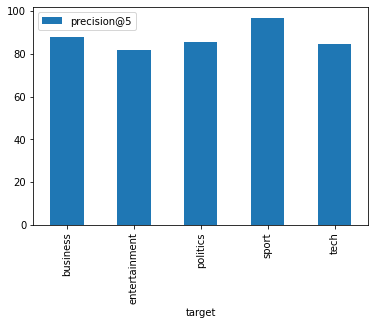

In [25]:
df_p5 = pd.DataFrame.from_dict(p5, orient='index', columns=['precision@5'])

df_p5["target"] = ['business', 'entertainment', 'politics','sport', 'tech']

d = df_p5.set_index("target")

d.plot.bar()

## 4) Análisis de errores

Vamos a investigar los resultados para entender mejor dónde están fallando los procesos de recuperación. Sigue los siguientes pasos.


1. Identifica la categoría de noticias donde la precisión media haya mejorado más al incorporar word-embeddings
2. Para dicha categoría, identifica la consulta donde la precisión haya mejorado más al usar word-embeddings
3. Muestra el texto original de la consulta y los términos que aparecen en las dos vectorizaciones tf-idf que usamos (recuerda que usamos diccionarios distintos para las vectorizaciones bolsa de palabras y word-embeddings).
4. Identifica las noticias recuperadas para dicha consulta para las dos aproximaciones y sus categorías (TF-IDF puro y con word-embeddings)
5. Muestra la intersección de términos entre la consulta y la primera noticia mal recuperada usando TF-IDF puro.
6. Muestra la intersección de términos entre la consulta y la última noticia bien recuperada usando word-embeddings.
7. A la luz de todo lo anterior, razona sobre por qué crees que el TF-IDF no fue capaz de clasificar bien la noticia y el word-embedding sí.


Puedes usar el código que calcula la intersección de términos que ponemos a continuación

In [98]:
def precisions_per_class(X_train, y_train, X_test, y_test, k):
    '''Devuelve las precision@k para cada una de las classes.
    
    Parámetros:
    - X_train: documentos de entrenamiento vectorizados.
    - y_train: etiquetas de los documentos de entrenamiento.
    - X_test: documentos vectorizados que se usan como consultas
    - y_test: etiquetas de los documentos que se usan como consultas
    - k: número de documentos considerados a recuperar por la consulta
    
    Devuelve:
    - Diccionario clase -> [[indice noticia,precision]].
    '''
    
    # diccionario categoría -> lista de precisiones
    y_precisions = {y: [] for y in np.unique(y_test)}
    
    index = 0 #contamos las noticias para obtener los indices
    
    # Calcular precision@k para cada consulta
    for x_query, y_query in zip(X_test, y_test):
        idx = knn(x_query, X_train, k)
        y_selected = np.take(y_train, idx)
        precision = [index,precision_at_k(y_selected, y_query, k)] 
        y_precisions[y_query].append(precision)
        index+=1
    
    return y_precisions

In [99]:
pre = precisions_per_class(train_preprocessed, train_data['Category'], test_preprocessed, test_data['Category'], 5)
we_pre = precisions_per_class(we_train_preprocessed, train_data['Category'], we_test_preprocessed, test_data['Category'], 5)

for i in range(0, len(pre['business'])):
    if (pre['business'][i][1] < we_pre['business'][i][1]): #el segundo elemento es la precision
        print(pre['business'][i][0], ':',pre['business'][i][1],we_pre['business'][i][1])

35 : 0.0 60.0
50 : 60.0 100.0
58 : 80.0 100.0
65 : 80.0 100.0
80 : 80.0 100.0
100 : 60.0 100.0
113 : 60.0 100.0
123 : 80.0 100.0
151 : 80.0 100.0
172 : 80.0 100.0
192 : 80.0 100.0
262 : 40.0 60.0
269 : 0.0 20.0
281 : 40.0 100.0
285 : 40.0 60.0
297 : 60.0 100.0


<font color='blue'>Hay varias consultas con un incremento del 60% en la precisión, por lo que tomaremos la primera encontrada al pasar de no tener ninguna similitud a una del 60% (i = 35)</font>

In [71]:
#3. Muestra el texto original de la consulta y los términos que aparecen en las dos vectorizaciones tf-idf que usamos
#(recuerda que usamos diccionarios distintos para las vectorizaciones bolsa de palabras y word-embeddings).

def terms_in_message(feature_names,vector_data,index):
    '''
    Devuelve un conjunto los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    mensaje=vector_data[index,:]>0
    terminos_presentes = ma.array(feature_names, mask = ~(mensaje[0].toarray()))

    return set(terminos_presentes.compressed())

In [118]:
print('Mensaje:\n',test_data.Text.tolist()[35])

print('\nBolsa de palabras:', sorted(terms_in_message(feature_names,test_preprocessed,35)))
print('\nWord-embeddings:',sorted(terms_in_message(we_feature_names,we_test_preprocessed,35)))


Mensaje:
 mcdonald s boss bell dies aged 44 charlie bell  the straight-talking former head of fast-food giant mcdonald s  has died of cancer aged 44.  mr bell was diagnosed with colorectal cancer in may last year  a month after taking over the top job. he resigned in november to fight the illness. joining the company as a 15-year-old part-time worker  mr bell quickly moved through its ranks  becoming australia s youngest store manager at 19. a popular go-getter  he is credited with helping revive mcdonald s sales. mr bell leaves a wife and daughter.  as we mourn his passing  i ask you to keep charlie s family in your hearts and prayers   chief executive james skinner said in a statement.  and remember that in his abbreviated time on this earth  charlie lived life to the fullest.   no matter what cards life dealt  charlie stayed centred on his love for his family and for mcdonald s.   after running the company s australian business in the 1990s  mr bell moved to the us in 1999 to run op

In [119]:
#4. Identifica las noticias recuperadas para dicha consulta para las dos aproximaciones y sus categorías (TF-IDF puro y con word-embeddings)
tf_noti = knn(test_preprocessed[35], train_preprocessed, 5)
we_noti = knn(we_test_preprocessed[35], we_train_preprocessed, 5)

print('TF-IDF puro:')
for elem in tf_noti:
    print(elem, train_data.Category.tolist()[elem])
    

print('\nTF-IDF con Word-embeddings:')
for elem in we_noti:
    print(elem, train_data.Category.tolist()[elem])

TF-IDF puro:
890 politics
432 entertainment
425 sport
92 politics
1159 politics

TF-IDF con Word-embeddings:
492 business
1068 entertainment
652 entertainment
219 business
230 business


In [130]:
#5. Muestra la intersección de términos entre la consulta y la primera noticia mal recuperada usando TF-IDF puro.
test_terms = sorted(terms_in_message(feature_names,test_preprocessed,35))
train_terms = sorted(terms_in_message(feature_names,train_preprocessed,890))

inter = []
for elem in train_terms:
    if elem in test_terms:
        inter.append(elem)

inter

['bell', 'chief', 'mr', 's', 'said']

In [125]:
#6. Muestra la intersección de términos entre la consulta y la última noticia bien recuperada usando word-embeddings.

we_test_terms = sorted(terms_in_message(we_feature_names,we_test_preprocessed,35))
we_train_terms = sorted(terms_in_message(we_feature_names,we_train_preprocessed,230))

we_inter = []
for elem in we_train_terms:
    if elem in we_test_terms:
        we_inter.append(elem)

we_inter

['biggest',
 'boosting',
 'business',
 'demand',
 'giant',
 'popular',
 's',
 'said',
 'sales',
 'year']

In [ ]:
#7. A la luz de todo lo anterior, razona sobre por qué crees que el TF-IDF no fue capaz de clasificar bien la noticia y el word-embedding sí.